<a href="https://colab.research.google.com/github/dorirozen/AI_Tasks/blob/main/NlpTask2_Dori_Shlomi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Creating the corpus from prev task
!pip install beautifulsoup4
import nltk,time,spacy,csv,requests
from bs4 import BeautifulSoup


#@title BeautifulSoup part
websites = ['https://afgprogrammer.com/flutter/','https://huggingface.co/docs/transformers/model_doc/hubert']

scrap_sentences = []

for web in websites:
    soup = BeautifulSoup(requests.get(web).text,'html.parser')
    for p in soup.find_all('p'):
        scrap_sentences.append(p.text)


print("Scraped Sentences:\n")
print(scrap_sentences[0:5])

# Save the corpus to a text file
with open('corpus.txt', 'w', encoding='utf-8') as file:
    for sentence in scrap_sentences:
        file.write(sentence + '\n')

print("Corpus saved to corpus.txt")

Scraped Sentences:

['Search in 100+ Flutter Examples ', 'Day 64 of Flutter 100 days of code.', 'Day 63 of Flutter 100 days of code.', 'Day 62 of Flutter 100 days of code.', 'Day 61 of Flutter 100 days of code.']
Corpus saved to corpus.txt


# Task 2


In [2]:
import spacy , nltk
from nltk.tokenize import WhitespaceTokenizer,RegexpTokenizer,sent_tokenize, word_tokenize
from nltk.grammar import CFG, Nonterminal
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer,WordNetLemmatizer
from pandas import unique
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Using the corpus we created in homework 1

In [3]:
sentences = []

with open("corpus.txt","r", encoding = "ISO-8859-1") as file:
  for s in file.readlines():
    sentences.append(s.replace("\n",""))

print(f"sentences size: {len(sentences)}")


sentences size: 463


Apply tokenization:
  - White space tokenizer
  - Regex tokenizer
  - Word tokenizer
  - Sentence tokenizer

In [4]:


""" This function return list of tokens """
def tokenizer(sentences:list[str],tokenize,limit=-1):
  tokens = []
  for s in sentences[:limit]:
    tokens.extend(tokenize(s))
  return list(unique(tokens))

print(f"The sentence:\n{sentences[0]}\nTokens:")

#White space tokenizer
wstk = WhitespaceTokenizer()
print(f"White space tokenizer: {tokenizer(sentences,wstk.tokenize,limit=5)}")

#Regex tokenizer
rgtk = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
print(f"Regex tokenizer: {tokenizer(sentences,rgtk.tokenize,limit=5)}")

#Word tokenizer
print(f"Word tokenizer: {tokenizer(sentences,word_tokenize,limit=5)}")

#Sentence tokenizer
print(f"Sentence tokenizer: {tokenizer(sentences,sent_tokenize,limit=5)}")

The sentence:
Search in 100+ Flutter Examples 
Tokens:
White space tokenizer: ['Search', 'in', '100+', 'Flutter', 'Examples', 'Day', '64', 'of', '100', 'days', 'code.', '63', '62', '61']
Regex tokenizer: ['Search', 'in', '100', '+', 'Flutter', 'Examples', 'Day', '64', 'of', 'days', 'code', '.', '63', '62', '61']
Word tokenizer: ['Search', 'in', '100+', 'Flutter', 'Examples', 'Day', '64', 'of', '100', 'days', 'code', '.', '63', '62', '61']
Sentence tokenizer: ['Search in 100+ Flutter Examples', 'Day 64 of Flutter 100 days of code.', 'Day 63 of Flutter 100 days of code.', 'Day 62 of Flutter 100 days of code.', 'Day 61 of Flutter 100 days of code.']


Apply Normalization:
- Stemming
- Lemmatization

In [5]:

# Example sentences (it look better then just passing the first sentences..)
sentencesNorm = [ # choose 5 that make sense..
    'A Flutter staggered grid view which supports multiple columns with rows of varying sizes.',
    'Use dynamic and beautiful card view pagers to help you create great apps.',
    'Yet another bottom navigation bar with a few key promises.',
    'Hubert was proposed in HuBERT: Self-Supervised Speech Representation Learning by Masked Prediction of Hidden Units by Wei-Ning Hsu, Benjamin Bolte, Yao-Hung Hubert Tsai, Kushal Lakhotia, Ruslan',
    'Salakhutdinov, Abdelrahman Mohamed.'
]


# Normalization function
def normalization(tokens, normalizer, limit=-1):
    return [normalizer(s) for s in tokens[:limit]]

# Tokenizer function
def tokenizer(sentences, tokenizer):
    return [token for sentence in sentences for token in tokenizer(sentence)]

# Stemming and lemmatization
def process_normalization(sentences, normalizer, limit=15):
    tokens = tokenizer(sentences, word_tokenize)
    return normalization(tokens, normalizer, limit)

# Initialize Spacy
nlp = spacy.load("en_core_web_sm")

# Normalizers
normalizers = {
    "Porter Stemming": PorterStemmer().stem,
    "Lancaster Stemming": LancasterStemmer().stem,
    "Snowball Stemming": SnowballStemmer(language='english').stem,
    "NLTK Lemmatization": WordNetLemmatizer().lemmatize,
    "Spacy Lemmatization": lambda s: [token.lemma_ for token in nlp(s)]
}

# Apply normalizers and print results
for name, normalizer in normalizers.items():
    if name == "Spacy Lemmatization":
        result = [normalizer(sentence) for sentence in sentencesNorm[:5]]
    else:
        result = process_normalization(sentencesNorm, normalizer)
    print(f"{name}: {result[:15]}")


Porter Stemming: ['a', 'flutter', 'stagger', 'grid', 'view', 'which', 'support', 'multipl', 'column', 'with', 'row', 'of', 'vari', 'size', '.']
Lancaster Stemming: ['a', 'flut', 'stag', 'grid', 'view', 'which', 'support', 'multipl', 'column', 'with', 'row', 'of', 'vary', 'siz', '.']
Snowball Stemming: ['a', 'flutter', 'stagger', 'grid', 'view', 'which', 'support', 'multipl', 'column', 'with', 'row', 'of', 'vari', 'size', '.']
NLTK Lemmatization: ['A', 'Flutter', 'staggered', 'grid', 'view', 'which', 'support', 'multiple', 'column', 'with', 'row', 'of', 'varying', 'size', '.']
Spacy Lemmatization: [['a', 'Flutter', 'stagger', 'grid', 'view', 'which', 'support', 'multiple', 'column', 'with', 'row', 'of', 'vary', 'size', '.'], ['use', 'dynamic', 'and', 'beautiful', 'card', 'view', 'pager', 'to', 'help', 'you', 'create', 'great', 'app', '.'], ['yet', 'another', 'bottom', 'navigation', 'bar', 'with', 'a', 'few', 'key', 'promise', '.'], ['Hubert', 'be', 'propose', 'in', 'hubert', ':', 'self'

Remove Stop Words: conjunctions and articles

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words_filtered = [word for word in words if word.lower() not in stop_words]
    text_filtered = ' '.join(words_filtered)
    return text_filtered

print(f"Source: {sentences[0]}")
print(f"Remove Stop Words: {remove_stopwords(sentences[0])}")


Source: Search in 100+ Flutter Examples 
Remove Stop Words: Search 100+ Flutter Examples


Apply feature extraction by the following algorithms:
- BOW
- TF-IDF
- Word embedding by WORD2VEC

In [8]:

# BOW

bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(sentences)
print(f"Matrix shape: {len(bow_matrix.toarray())}x{len(bow_matrix.toarray()[0])}\n")

print(f"--- BOW ---")
print(bow_matrix.toarray()[0][110:120])
print(bow_vectorizer.get_feature_names_out()[110:120])

# TF-IDF
print(f"\n\n--- TF-IDF ---")
tf_idf_vectorizer = TfidfVectorizer()
print(tf_idf_vectorizer.fit_transform(sentences)[0])
print(tf_idf_vectorizer.get_feature_names_out()[110:120])



Matrix shape: 463x673

--- BOW ---
[0 0 0 0 0 0 0 0 0 0]
['benefit' 'benjamin' 'bert' 'better' 'between' 'bolte' 'bool'
 'bos_token_id' 'bottom' 'bouncing']


--- TF-IDF ---
  (0, 207)	0.5859543157170254
  (0, 226)	0.2933855212089265
  (0, 4)	0.3428966492317968
  (0, 281)	0.3311523873925078
  (0, 506)	0.5859543157170254
['benefit' 'benjamin' 'bert' 'better' 'between' 'bolte' 'bool'
 'bos_token_id' 'bottom' 'bouncing']


In [11]:

# Word embedding by WORD2VEC
corpus = []
for s in sentences:
  corpus.append(tokenizer([s],word_tokenize,limit=1))

# Train the Word2Vec model
model = Word2Vec(
    sentences=corpus,   # The corpus to train the model on
    vector_size=100,     # The size of the word vectors to be learned
    window=5,              # The size of the window of words to be considered
    min_count=1,           # The minimum frequency required for a word to be included in the vocabulary
    sg=0,                  # 0 for CBOW, 1 for skip-gram
    negative=5,            # The number of negative samples to use for negative sampling
    ns_exponent=0.75,      # The exponent used to shape the negative sampling distribution
    alpha=0.03,            # The initial learning rate
    min_alpha=0.0007,      # The minimum learning rate to which the learning rate will be linearly reduced
    epochs=30,             # The number of epochs (iterations) over the corpus
    workers=4,             # The number of worker threads to use for training the model
    seed=42,               # The seed for the random number generator
    max_vocab_size=None    # The maximum vocabulary size (None means no limit)
)

word_to_check = 'Flutter'

if word_to_check in model.wv:
    vector = model.wv[word_to_check]
    # Find the most similar words to a given word
    similar_words = model.wv.most_similar(word_to_check)

    # Print the vector and similar words
    print(f"Vector for '{word_to_check}':", vector)
    print(f"Most similar words to '{word_to_check}':", similar_words)
else:
    print(f"Word '{word_to_check}' not found in vocabulary.")

Vector for 'Flutter': [-0.14729781  0.29750034 -0.38956866  0.40070105  0.12812424  0.4901716
  0.11166948  0.7940336  -0.3921287   0.35432923 -0.42261598  0.8413246
  0.13609315 -0.02202416 -0.08763188 -0.17329317 -0.24687956 -0.2766637
 -0.0833912  -0.10908526  0.40702906  0.28916106  0.47542235  0.24836221
 -0.07753623  0.54155904 -0.5260723   0.04159054 -0.32424164 -0.3875142
  0.01231295 -0.17406069 -0.1954934   0.6838543   0.12853292 -0.4455833
 -0.60480535 -0.73664635 -0.16314745  0.46314356  0.16573843  0.23868641
  0.4834183  -0.07753997  0.26256952  0.57499176  0.05003868  0.6256608
  0.5687501   0.2560088  -0.4048323  -0.5816231   0.27039713  0.1509341
  0.1913862  -0.3174618   0.28707162 -0.1933461  -0.2852275   0.3599017
 -0.65164196 -0.01407406 -0.09053874  0.22271201 -0.05659182 -0.24223958
 -0.01063277 -0.6355571   0.13675553 -0.19490103 -0.24847013 -0.1461057
  0.06155507 -0.2457478   0.3061659   0.1618551   0.04067988  0.41544604
 -0.08851941  0.13894758  0.50989383 -

# What is GloVe?  
GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm developed by researchers at Stanford for obtaining vector representations for words. The main idea behind GloVe is to capture the meaning of words by looking at their co-occurrence statistics in a large corpus. GloVe vectors represent words in a high-dimensional space where the distance and direction between words can capture semantic relationships.

In [12]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import os
import urllib.request
import zipfile

# Ensure you have the GloVe file downloaded
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
zipfilename = url.rsplit('/', 1)[-1]
filename = zipfilename.rsplit('.', 1)[0]

print("Downloading GloVe embeddings...")
urllib.request.urlretrieve(url, zipfilename)
print("Download complete.")

print("Extracting GloVe embeddings...")
with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall()
print("Extraction complete.")

# Load GloVe embeddings
def load_glove_model(glove_file):
    print("Loading GloVe model...")
    model = {}
    with open(glove_file, 'r', encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    print("Done.", len(model), " words loaded!")
    return model

# Path to GloVe file
glove_file = "glove.6B.50d.txt"  # Make sure this file is in your working directory

# Load the GloVe model
glove_model = load_glove_model(glove_file)

# Example sentences
sentences = [
    'A Flutter staggered grid view which supports multiple columns with rows of varying sizes.',
    'Use dynamic and beautiful card view pagers to help you create great apps.',
    'Yet another bottom navigation bar with a few key promises.',
    'Hubert was proposed in HuBERT: Self-Supervised Speech Representation Learning by Masked Prediction of Hidden Units by Wei-Ning Hsu, Benjamin Bolte, Yao-Hung Hubert Tsai, Kushal Lakhotia, Ruslan',
    'Salakhutdinov, Abdelrahman Mohamed.'
]

# Function to convert sentences to GloVe embeddings
def sentence_to_glove(sentence, glove_model):
    tokens = word_tokenize(sentence.lower())
    vectors = [glove_model[token] for token in tokens if token in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50)  # Return a zero vector if no tokens are found

# Compute GloVe embeddings for sentences
glove_embeddings = [sentence_to_glove(sentence, glove_model) for sentence in sentences]

# Print the embeddings
for i, embedding in enumerate(glove_embeddings):
    print(f"Sentence {i+1} GloVe embedding: {embedding}")

Download complete.
Extracting GloVe embeddings...
Extraction complete.
Loading GloVe model...
Done. 400000  words loaded!
Sentence 1 GloVe embedding: [ 0.3484296   0.3851346   0.1631234  -0.08282333  0.1819038   0.52050847
 -0.00614613 -0.45836733 -0.1030844  -0.25582107 -0.1319028  -0.31361333
 -0.1020254   0.16592813 -0.13693787 -0.03395488 -0.19639703 -0.13824147
 -0.09832622 -0.7163274   0.02562753 -0.2026846   0.18284467  0.07186505
 -0.09771815 -0.570934   -0.201538    0.25061093  0.12621231 -0.0205856
  2.71114933  0.06023756  0.00571573 -0.35129447  0.03799913  0.15220443
  0.07142327  0.06880487 -0.23841413  0.09578153  0.07572035 -0.0519618
 -0.04808693  0.3564852  -0.249343    0.04569329  0.2498818  -0.0949004
 -0.1268876  -0.37642407]
Sentence 2 GloVe embedding: [ 3.52329364e-01  2.07038857e-01  2.26760000e-01  1.04433357e-01
  3.48035857e-01  4.86328571e-02 -3.26107500e-01 -4.52099271e-01
 -3.00410714e-02  3.56521500e-01  2.74543571e-02  3.20700300e-01
  7.16107429e-02 -8.

# Explanation and Results :  
Loading GloVe Model: We load the pre-trained GloVe embeddings from a file.

This file contains word vectors for many English words, each represented as a 50-dimensional vector.

Tokenizing Sentences: Each sentence is tokenized into words.
Mapping Tokens to GloVe Vectors: For each token in the sentence, we find the corresponding GloVe vector.

Computing Sentence Embeddings: We compute the sentence embedding by averaging the GloVe vectors of the words in the sentence. If no words in the sentence are found in the GloVe model, we return a zero vector.

The GloVe embeddings for each sentence are printed as high-dimensional vectors. These embeddings can be used for various NLP tasks such as clustering, classification, and similarity computations.

The results (GloVe embeddings) capture the semantic meaning of the sentences, allowing us to use these vectors for more advanced NLP applications. For example, similar sentences will have embeddings that are close to each other in the vector space.

Select 5 sentences and apply to them Tagging by CYK algorithm


In [18]:
sentences = [
    "She sells sea shells by the sea shore.",
    "The quick brown fox jumps over the lazy dog.",
    "A fox jumped over the rat.",
    "A dog jumped over the sea shore.",
]
sentences

['She sells sea shells by the sea shore.',
 'The quick brown fox jumps over the lazy dog.',
 'A fox jumped over the rat.',
 'A dog jumped over the sea shore.']

# CYK PART
1 sentence manully for :
The cat sat on the mat.

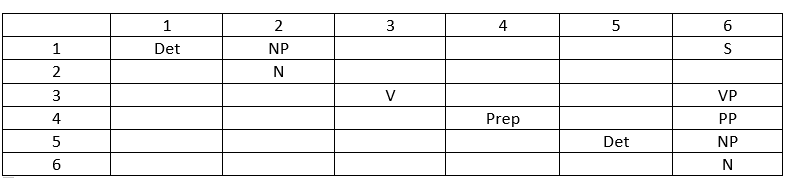

In [19]:
#@title CYK with code (good version)
import re

def preprocess_sentence(sentence):
    return re.sub(r'[^\w\s]', '', sentence).lower()

def cyk_parse(sentence, grammar):
    words = sentence.split()
    n = len(words)
    table = [[set() for _ in range(n)] for _ in range(n)]

    for i, word in enumerate(words):
        for lhs, rhs_list in grammar.items():
            for rhs in rhs_list:
                if isinstance(rhs, str) and rhs.lower() == word.lower():
                    table[i][i].add(lhs)

    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            for k in range(i, j):
                for lhs, rhs_list in grammar.items():
                    for rhs in rhs_list:
                        if isinstance(rhs, list) and len(rhs) == 2:
                            B, C = rhs
                            if B in table[i][k] and C in table[k+1][j]:
                                table[i][j].add(lhs)

    return table

def print_cyk_table(table, words):
    n = len(words)
    print(f"{'':6}", end='')
    for i, word in enumerate(words):
        print(f"{i+1:^12}", end='')
    print()

    for i in range(n):
        print(f"{i+1:<6}", end='')
        for j in range(n):
            if j < i:
                print(f"{'':12}", end='')
            else:
                cell_content = ', '.join(sorted(table[i][j])) if table[i][j] else ''
                print(f"{cell_content:^12}", end='')
        print()

grammar = {
    'S': [['NP', 'VP']],
    'NP': [['Det', 'N']],
    'VP': [['V', 'PP']],
    'PP': [['Prep', 'NP']],
    'Det': ['the', 'a'],
    'N': ['cat', 'mat', 'dog', 'fox', 'rat'],
    'V': ['sat', 'jumped'],
    'Prep': ['on', 'over'],
}

for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}:")
    print(sentence)
    preprocessed_sentence = preprocess_sentence(sentence)
    words = preprocessed_sentence.split()
    result = cyk_parse(preprocessed_sentence, grammar)
    print_cyk_table(result, words)
    print(f"\nThe sentence is {'valid' if 'S' in result[0][len(words)-1] else 'invalid'} according to the grammar.")
    print("-" * 100)


Sentence 1:
She sells sea shells by the sea shore.
           1           2           3           4           5           6           7           8      
1                                                                                                     
2                                                                                                     
3                                                                                                     
4                                                                                                     
5                                                                                                     
6                                                                     Det                             
7                                                                                                     
8                                                                                                     

The sentence is inva

In [20]:
%%shell
jupyter nbconvert --to html /content/NlpTask2_Dori_Shlomi.ipynb

[NbConvertApp] Converting notebook /content/NlpTask2_Dori_Shlomi.ipynb to html
[NbConvertApp] Writing 681219 bytes to /content/NlpTask2_Dori_Shlomi.html
